In [151]:
#import libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [152]:
#import dataset
df = pd.read_csv("../data/demand_rawdata.csv")
df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [153]:
#There are several categories in the Superstore sales data, 
#we start from time series analysis and forecasting for the category 'Category_028'.

product1 = df.loc[df['Product_Code'] == 'Product_0979']
product2 = df.loc[df['Product_Code'] == 'Product_1157']
product1

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500
10,Product_0979,Whse_J,Category_028,2012/8/29,500


In [154]:
product2

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
50,Product_1157,Whse_J,Category_006,2012/3/8,150000
51,Product_1157,Whse_J,Category_006,2012/3/8,150000
52,Product_1157,Whse_J,Category_006,2012/4/23,150000
53,Product_1157,Whse_J,Category_006,2012/5/23,150000
54,Product_1157,Whse_J,Category_006,2012/6/4,160000
55,Product_1157,Whse_J,Category_006,2012/6/4,160000
56,Product_1157,Whse_J,Category_006,2012/8/9,160000
57,Product_1157,Whse_J,Category_006,2012/8/20,160000
58,Product_1157,Whse_J,Category_006,2012/9/10,160000
59,Product_1157,Whse_J,Category_006,2012/10/19,160000


In [155]:
#chech null values
product1.isnull().sum()

Product_Code         0
Warehouse            0
Product_Category     0
Date                39
Order_Demand         0
dtype: int64

In [156]:
product2.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [157]:
#discard the rows having missing date under product 1
product1.drop(product1[product1.Date.isnull()].index, inplace=True)

In [158]:
#convert the Date to datetime
product1.loc[:, 'Date'] = pd.to_datetime(product1.loc[:,'Date'], format="%Y/%m/%d")
product2.loc[:, 'Date'] = pd.to_datetime(product2.loc[:,'Date'], format="%Y/%m/%d")

In [159]:
product1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3889 entries, 1 to 1046256
Data columns (total 5 columns):
Product_Code        3889 non-null object
Warehouse           3889 non-null object
Product_Category    3889 non-null object
Date                3889 non-null datetime64[ns]
Order_Demand        3889 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 182.3+ KB


In [160]:
product2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 50 to 1017866
Data columns (total 5 columns):
Product_Code        718 non-null object
Warehouse           718 non-null object
Product_Category    718 non-null object
Date                718 non-null datetime64[ns]
Order_Demand        718 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 33.7+ KB


In [161]:
product1.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
5,Product_0979,Whse_J,Category_028,2012-04-19,500


In [162]:
product2.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
50,Product_1157,Whse_J,Category_006,2012-03-08,150000
51,Product_1157,Whse_J,Category_006,2012-03-08,150000
52,Product_1157,Whse_J,Category_006,2012-04-23,150000
53,Product_1157,Whse_J,Category_006,2012-05-23,150000
54,Product_1157,Whse_J,Category_006,2012-06-04,160000


In [163]:
product1['Date'].min(), product1['Date'].max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2016-12-26 00:00:00'))

In [164]:
product2['Date'].min(), product2['Date'].max()

(Timestamp('2012-01-05 00:00:00'), Timestamp('2016-12-26 00:00:00'))

In [165]:
#We've 5 years of order sales data for Product 0979 and Product 1157

In [166]:
#DATA PREPROCESSING - removing columns we do not need, check missing values, aggregate sales by date and so on.

In [167]:
cols = ['Warehouse','Product_Category', 'Product_Code']
product1.drop(cols, axis=1, inplace=True)
product1 = product1.sort_values('Date')


In [168]:
product2.drop(cols, axis=1, inplace=True)
product2 = product2.sort_values('Date')

In [169]:
product1.head()

,Date,Order_Demand
72204,2012-01-03,2000
179367,2012-01-05,100
90037,2012-01-05,500
44021,2012-01-05,500
57166,2012-01-05,100


In [170]:
product2.head()

,Date,Order_Demand
166129,2012-01-05,10000
52783,2012-01-10,60000
52788,2012-01-12,40000
52786,2012-01-12,50000
52790,2012-01-16,40000


In [171]:
product1 = product1.groupby('Date')['Order_Demand'].count().reset_index()

In [172]:
product1.head()

,Date,Order_Demand
0,2012-01-03,1
1,2012-01-05,8
2,2012-01-06,5
3,2012-01-09,1
4,2012-01-10,2


In [173]:
product2 = product2.groupby('Date')['Order_Demand'].count().reset_index()
product2.head()

,Date,Order_Demand
0,2012-01-05,1
1,2012-01-10,1
2,2012-01-12,2
3,2012-01-16,2
4,2012-01-19,1


In [174]:
#Indexing with timeseries data
product1 = product1.set_index('Date')
product1.index

DatetimeIndex(['2012-01-03', '2012-01-05', '2012-01-06', '2012-01-09',
               '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
               '2012-01-16', '2012-01-17',
               ...
               '2016-12-12', '2016-12-13', '2016-12-15', '2016-12-16',
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26'],
              dtype='datetime64[ns]', name='Date', length=1219, freq=None)

In [175]:
product2 = product2.set_index('Date')
product2.index

DatetimeIndex(['2012-01-05', '2012-01-10', '2012-01-12', '2012-01-16',
               '2012-01-19', '2012-01-25', '2012-01-26', '2012-02-01',
               '2012-02-06', '2012-02-09',
               ...
               '2016-12-02', '2016-12-05', '2016-12-08', '2016-12-09',
               '2016-12-12', '2016-12-13', '2016-12-15', '2016-12-19',
               '2016-12-21', '2016-12-26'],
              dtype='datetime64[ns]', name='Date', length=476, freq=None)

In [140]:
#current datetime data can be tricky to work with
#We'll use monthly data
#using the start of each month as the timestamp


In [176]:
y_product1 = product1['Order_Demand'].resample('MS').mean()
y_product2 = product2['Order_Demand'].resample('MS').mean()

In [177]:
#Quick peek 2016 data
y_product1['2016':]

Date
2016-01-01    2.823529
2016-02-01    3.055556
2016-03-01    2.000000
2016-04-01    3.000000
2016-05-01    2.500000
2016-06-01    2.315789
2016-07-01    3.100000
2016-08-01    2.388889
2016-09-01    2.157895
2016-10-01    2.904762
2016-11-01    2.363636
2016-12-01    2.800000
Freq: MS, Name: Order_Demand, dtype: float64

In [178]:
y_product2['2016':]

Date
2016-01-01    1.250000
2016-02-01    1.272727
2016-03-01    1.500000
2016-04-01    1.000000
2016-05-01    1.416667
2016-06-01    1.461538
2016-07-01    1.666667
2016-08-01    1.875000
2016-09-01    1.500000
2016-10-01    1.125000
2016-11-01    1.818182
2016-12-01    1.454545
Freq: MS, Name: Order_Demand, dtype: float64

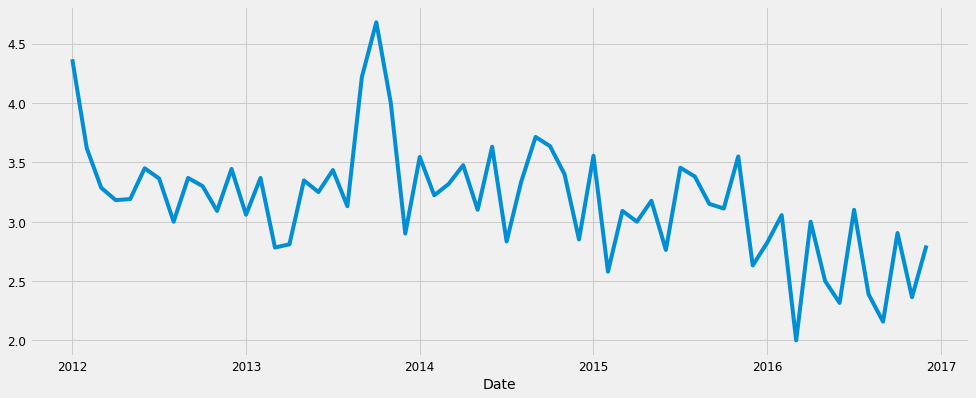

In [179]:
#Visualizing Product 1 Demand Time Series Data
y_product1.plot(figsize=(15, 6))
plt.show()

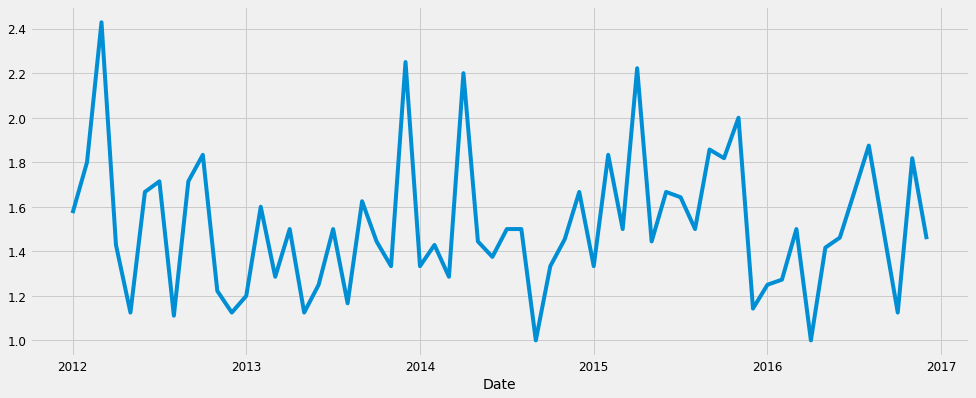

In [180]:
#Visualizing Product 2 Demand Time Series Data
y_product2.plot(figsize=(15, 6))
plt.show()

In [181]:
#Comparing the two product demands

product1 = pd.DataFrame({'Date':y_product1.index, 'Order_Demand':y_product1.values})
product2 = pd.DataFrame({'Date': y_product2.index, 'Order_Demand': y_product2.values})

store = product1.merge(product2, how='inner', on='Date')
store.rename(columns={'Demand_x': 'Product0979_Demand', 'Demand_y': 'product1157_demand'}, inplace=True)
store.head()

,Date,Order_Demand_x,Order_Demand_y
0,2012-01-01,4.368421,1.571429
1,2012-02-01,3.619048,1.800000
2,2012-03-01,3.285714,2.428571
3,2012-04-01,3.181818,1.428571
4,2012-05-01,3.190476,1.125000


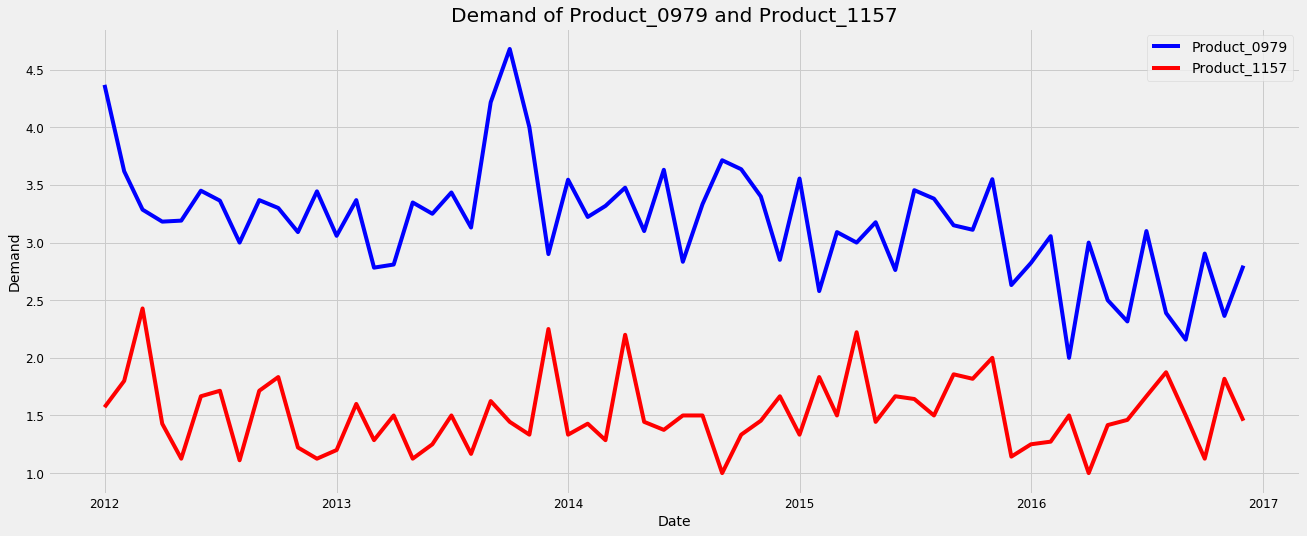

In [182]:
plt.figure(figsize=(20, 8))
plt.plot(store['Date'], store['Order_Demand_x'], 'b-', label = 'Product_0979')
plt.plot(store['Date'], store['Order_Demand_y'], 'r-', label = 'Product_1157')
plt.xlabel('Date'); plt.ylabel('Demand'); plt.title('Demand of Product_0979 and Product_1157')
plt.legend();

In [183]:
#Product_0979 has quite higher demand

In [184]:
#Forecasting with Facebook Prophet
from fbprophet import Prophet

product1 = product1.rename(columns={'Date': 'ds', 'Order_Demand': 'y'})

In [205]:
product1_model = Prophet(interval_width=0.95, weekly_seasonality=True)
product1_model.fit(product1)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
product2 = product2.rename(columns={'Date': 'ds', 'Order_Demand': 'y'})
product2_model = Prophet(interval_width=0.95, weekly_seasonality=True)
product2_model.fit(product2)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
product1_forecast = product1_model.make_future_dataframe(periods=36, freq='MS')
product1_forecast = product1_model.predict(product1_forecast)

In [208]:
product2_forecast = product2_model.make_future_dataframe(periods=36, freq='MS')
product2_forecast = product2_model.predict(product2_forecast)

<Figure size 1296x432 with 0 Axes>

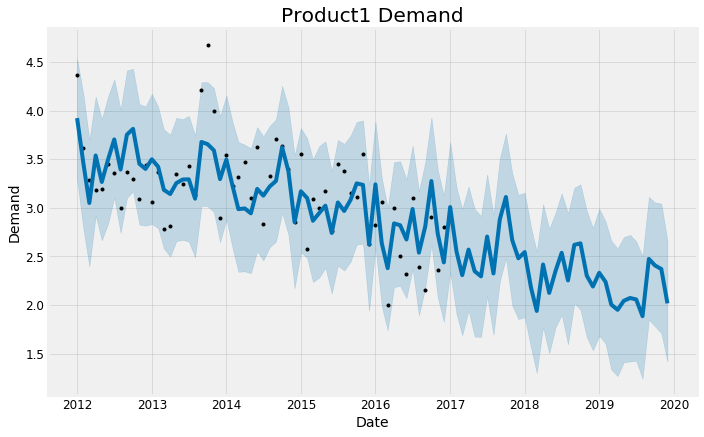

In [209]:
plt.figure(figsize=(18, 6))
product1_model.plot(product1_forecast, xlabel = 'Date', ylabel = 'Demand')
plt.title('Product1 Demand');

<Figure size 1296x432 with 0 Axes>

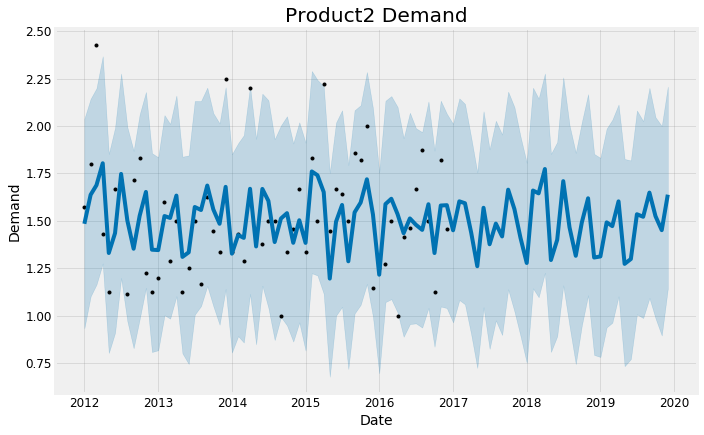

In [210]:
plt.figure(figsize=(18, 6))
product2_model.plot(product2_forecast, xlabel = 'Date', ylabel = 'Demand')
plt.title('Product2 Demand');

In [211]:
product1_names = ['product1_%s' % column for column in product1_forecast.columns]
product2_names = ['product2_%s' % column for column in product2_forecast.columns]

In [212]:
merge_product1_forecast = product1_forecast.copy()
merge_product2_forecast = product2_forecast.copy()

In [213]:
merge_product1_forecast.columns = product1_names
merge_product2_forecast.columns = product2_names

In [214]:
forecast = pd.merge(merge_product1_forecast, merge_product2_forecast, how = 'inner', left_on = 'product1_ds', right_on = 'product2_ds')
forecast = forecast.rename(columns={'product1_ds': 'Date'}).drop('product2_ds', axis=1)
forecast.head()

,Date,product1_trend,product1_yhat_lower,product1_yhat_upper,product1_trend_lower,product1_trend_upper,product1_additive_terms,product1_additive_terms_lower,product1_additive_terms_upper,product1_weekly,...,product2_weekly,product2_weekly_lower,product2_weekly_upper,product2_yearly,product2_yearly_lower,product2_yearly_upper,product2_multiplicative_terms,product2_multiplicative_terms_lower,product2_multiplicative_terms_upper,product2_yhat
0,2012-01-01,3.573342,3.286447,4.536509,3.573342,3.573342,0.351197,0.351197,0.351197,0.138550,...,0.157690,0.157690,0.157690,-0.200938,-0.200938,-0.200938,0.0,0.0,0.0,1.483788
1,2012-02-01,3.560894,2.780804,4.166212,3.560894,3.560894,-0.104623,-0.104623,-0.104623,0.019272,...,0.015125,0.015125,0.015125,0.095152,0.095152,0.095152,0.0,0.0,0.0,1.636800
2,2012-03-01,3.549250,2.397111,3.701426,3.549250,3.549250,-0.498585,-0.498585,-0.498585,-0.139184,...,0.076708,0.076708,0.076708,0.084827,0.084827,0.084827,0.0,0.0,0.0,1.687579
3,2012-04-01,3.536802,2.919502,4.144843,3.536802,3.536802,0.002926,0.002926,0.002926,0.138550,...,0.157690,0.157690,0.157690,0.119925,0.119925,0.119925,0.0,0.0,0.0,1.803146
4,2012-05-01,3.524755,2.665786,3.914502,3.524755,3.524755,-0.258090,-0.258090,-0.258090,-0.119193,...,0.029232,0.029232,0.029232,-0.224467,-0.224467,-0.224467,0.0,0.0,0.0,1.329801


In [215]:
#Compared Forecasts as shown above

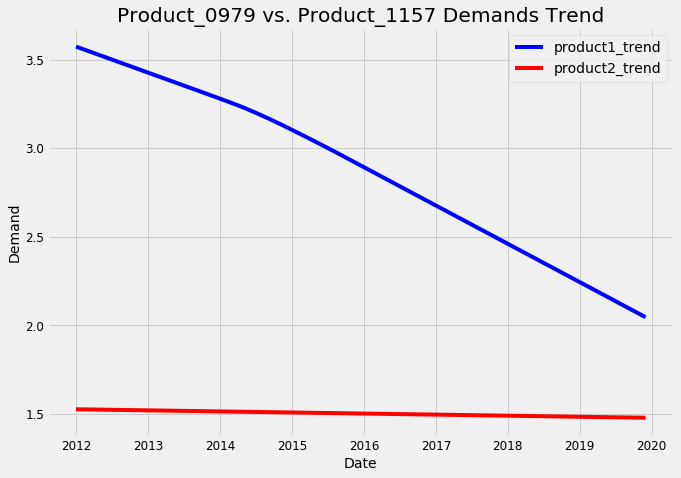

In [216]:
#Trend and Forecast Visualization
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['product1_trend'], 'b-')
plt.plot(forecast['Date'], forecast['product2_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Demand')
plt.title('Product_0979 vs. Product_1157 Demands Trend');

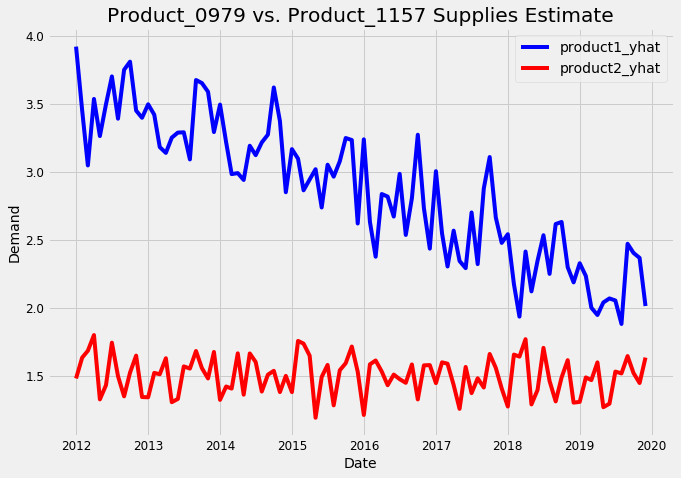

In [217]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['product1_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['product2_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Demand')
plt.title('Product_0979 vs. Product_1157 Supplies Estimate');

In [218]:
#Trends and Patterns
#Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

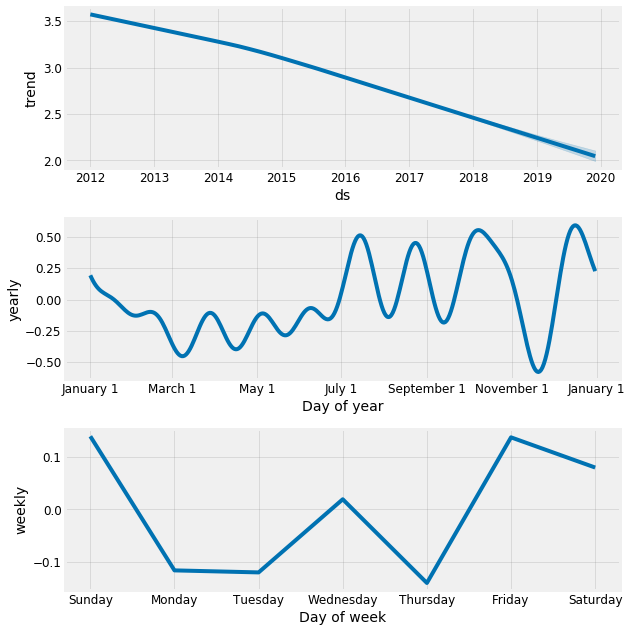

In [219]:
product1_model.plot_components(product1_forecast);

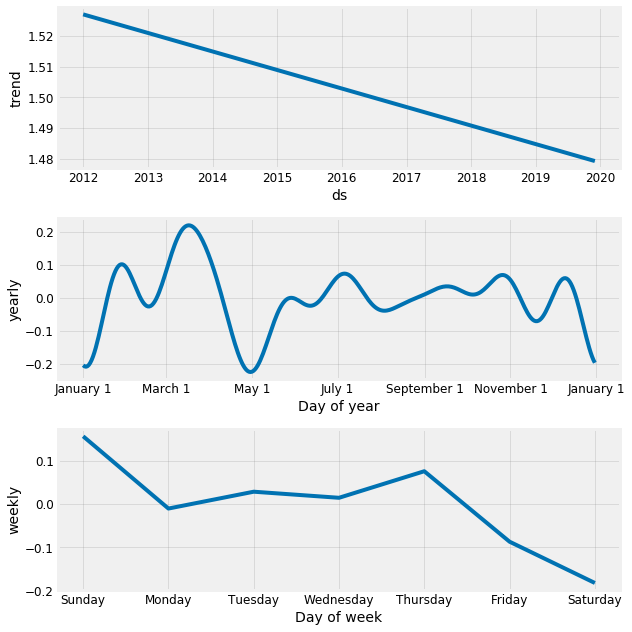

In [220]:
product2_model.plot_components(product2_forecast);

In [ ]:
# Observation:

# Product_0979---
# The trend for both of the products chosen doesn't seem to be very optimistic overall.
# Oct and Dec seem to be the peak time for demands of Product_0979 while during March it seems to be pretty less.
# Also, Sunday and Friday seems to be the peak days for the demand

# Product_1157---
# The overall trend is not very promising and it's decreasing.
# Highest demand seem to be sometime around March.
# Also, Sunday and Thursday being the days with maximum demands.